In [1]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!unzip '/content/drive/My Drive/Robotic Project/Dementia/Alzheimer_s Dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Alzheimer_s Dataset/MildDemented/mildDem715.jpg  
  inflating: Alzheimer_s Dataset/MildDemented/mildDem716.jpg  
  inflating: Alzheimer_s Dataset/MildDemented/mildDem72.jpg  
  inflating: Alzheimer_s Dataset/MildDemented/mildDem73.jpg  
  inflating: Alzheimer_s Dataset/MildDemented/mildDem74.jpg  
  inflating: Alzheimer_s Dataset/MildDemented/mildDem75.jpg  
  inflating: Alzheimer_s Dataset/MildDemented/mildDem76.jpg  
  inflating: Alzheimer_s Dataset/MildDemented/mildDem77.jpg  
  inflating: Alzheimer_s Dataset/MildDemented/mildDem78.jpg  
  inflating: Alzheimer_s Dataset/MildDemented/mildDem79.jpg  
  inflating: Alzheimer_s Dataset/MildDemented/mildDem8.jpg  
  inflating: Alzheimer_s Dataset/MildDemented/mildDem80.jpg  
  inflating: Alzheimer_s Dataset/MildDemented/mildDem81.jpg  
  inflating: Alzheimer_s Dataset/MildDemented/mildDem82.jpg  
  inflating: Alzheimer_s Dataset/MildDemented/mildDem83.jpg  
  inflating: Alzhe

In [3]:
!mkdir Train
!mkdir Train/MildDemented
!mkdir Train/ModerateDemented
!mkdir Train/NonDemented
!mkdir Train/VeryMildDemented
!mkdir Val
!mkdir Val/MildDemented
!mkdir Val/ModerateDemented
!mkdir Val/NonDemented
!mkdir Val/VeryMildDemented

In [5]:
import os

path1="/content/Alzheimer_s Dataset/MildDemented"
path2="/content/Alzheimer_s Dataset/ModerateDemented"
path3="/content/Alzheimer_s Dataset/NonDemented"
path4="/content/Alzheimer_s Dataset/VeryMildDemented"

MildDemented_names=os.listdir(path1)
ModerateDemented_names=os.listdir(path2)
NonDemented_names=os.listdir(path3)
VeryMildDemented_names=os.listdir(path4)

print(len(MildDemented_names))
print(len(ModerateDemented_names))
print(len(NonDemented_names))
print(len(VeryMildDemented_names))

896
64
3200
1700


In [6]:
import shutil

train_rate=0.75

train_num_MildDemented=int(train_rate*len(MildDemented_names))
train_num_ModerateDemented=int(train_rate*len(ModerateDemented_names))
train_num_NonDemented=int(train_rate*len(NonDemented_names))
train_num_VeryMildDemented=int(train_rate*len(VeryMildDemented_names))

for i in range(len(MildDemented_names)):
  if i<train_num_MildDemented:
    shutil.move('/content/Alzheimer_s Dataset/MildDemented/'+MildDemented_names[i],'/content/Train/MildDemented/'+MildDemented_names[i])
  else:
    shutil.move('/content/Alzheimer_s Dataset/MildDemented/'+MildDemented_names[i],'/content/Val/MildDemented/'+MildDemented_names[i])

for i in range(len(ModerateDemented_names)):
  if i<train_num_ModerateDemented:
    shutil.move('/content/Alzheimer_s Dataset/ModerateDemented/'+ModerateDemented_names[i],'/content/Train/ModerateDemented/'+ModerateDemented_names[i])
  else:
    shutil.move('/content/Alzheimer_s Dataset/ModerateDemented/'+ModerateDemented_names[i],'/content/Val/ModerateDemented/'+ModerateDemented_names[i])

for i in range(len(NonDemented_names)):
  if i<train_num_NonDemented:
    shutil.move('/content/Alzheimer_s Dataset/NonDemented/'+NonDemented_names[i],'/content/Train/NonDemented/'+NonDemented_names[i])
  else:
    shutil.move('/content/Alzheimer_s Dataset/NonDemented/'+NonDemented_names[i],'/content/Val/NonDemented/'+NonDemented_names[i])

for i in range(len(VeryMildDemented_names)):
  if i<train_num_VeryMildDemented:
    shutil.move('/content/Alzheimer_s Dataset/VeryMildDemented/'+VeryMildDemented_names[i],'/content/Train/VeryMildDemented/'+VeryMildDemented_names[i])
  else:
    shutil.move('/content/Alzheimer_s Dataset/VeryMildDemented/'+VeryMildDemented_names[i],'/content/Val/VeryMildDemented/'+VeryMildDemented_names[i])

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0,
        zoom_range=0,
        horizontal_flip=False,
        vertical_flip=False,
        rotation_range=0,
        width_shift_range=0.1,
        height_shift_range=0.1)

train_batch=32
val_batch=8

train_generator = datagen.flow_from_directory(
        'Train/',
        target_size=(176,208),
        batch_size=train_batch,
        class_mode='categorical') 

val_generator = datagen.flow_from_directory(
        'Val/',
        target_size=(176,208),
        batch_size=val_batch,
        class_mode='categorical') 

Found 4395 images belonging to 4 classes.
Found 1465 images belonging to 4 classes.


In [8]:
train_generator.class_indices

{'MildDemented': 0,
 'ModerateDemented': 1,
 'NonDemented': 2,
 'VeryMildDemented': 3}

In [12]:
import tensorflow as tf

model = tf.keras.models.Sequential([  
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',padding='same', input_shape=(176,208,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 176, 208, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 88, 104, 16)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 88, 104, 32)       4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 44, 52, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 44, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 22, 26, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 22, 26, 64)       

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint

cl2=ModelCheckpoint('/content/drive/My Drive/Robotic Project/Dementia/backup/weights.{epoch:02d}.hdf5', monitor='val_loss',
                    verbose=0, savefreq='epoch')

loss = []
acc = []
val_loss = []
val_acc = []

history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples//train_batch,
      validation_data=val_generator, 
      validation_steps=val_generator.samples//val_batch,
      epochs=25,
      verbose=1,
      callbacks=[cl2])

loss.extend(history.history['loss'])
acc.extend(history.history['acc'])
val_loss.extend(history.history['val_loss'])
val_acc.extend(history.history['val_acc'])

Epoch 1/25
137/137 [==============================] - 50s 367ms/step - loss: 1.0539 - acc: 0.5272 - val_loss: 1.0213 - val_acc: 0.5464
Epoch 2/25
137/137 [==============================] - 50s 366ms/step - loss: 1.0077 - acc: 0.5455 - val_loss: 1.0514 - val_acc: 0.5492
Epoch 3/25
137/137 [==============================] - 50s 365ms/step - loss: 0.9243 - acc: 0.5611 - val_loss: 0.8722 - val_acc: 0.5936
Epoch 4/25
137/137 [==============================] - 50s 364ms/step - loss: 0.8624 - acc: 0.6044 - val_loss: 0.8350 - val_acc: 0.6161
Epoch 5/25
137/137 [==============================] - 50s 366ms/step - loss: 0.8199 - acc: 0.6122 - val_loss: 0.8854 - val_acc: 0.6182
Epoch 6/25
137/137 [==============================] - 49s 359ms/step - loss: 0.7903 - acc: 0.6395 - val_loss: 0.7894 - val_acc: 0.6421
Epoch 7/25
137/137 [==============================] - 49s 360ms/step - loss: 0.7503 - acc: 0.6679 - val_loss: 0.7566 - val_acc: 0.6557
Epoch 8/25
137/137 [==============================] - 4

In [16]:
from tensorflow.keras.models import load_model

Model=load_model('/content/drive/My Drive/Robotic Project/Dementia/backup/weights.25.hdf5')

history = Model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples//train_batch,
      validation_data=val_generator, 
      validation_steps=val_generator.samples//val_batch,
      epochs=25,
      verbose=1,
      callbacks=[cl2])

loss.extend(history.history['loss'])
acc.extend(history.history['acc'])
val_loss.extend(history.history['val_loss'])
val_acc.extend(history.history['val_acc'])

Epoch 1/25
137/137 [==============================] - 49s 361ms/step - loss: 0.1596 - acc: 0.9445 - val_loss: 0.2393 - val_acc: 0.9071
Epoch 2/25
137/137 [==============================] - 49s 360ms/step - loss: 0.1455 - acc: 0.9459 - val_loss: 0.2875 - val_acc: 0.9030
Epoch 3/25
137/137 [==============================] - 49s 361ms/step - loss: 0.1461 - acc: 0.9436 - val_loss: 0.2856 - val_acc: 0.8907
Epoch 4/25
137/137 [==============================] - 49s 358ms/step - loss: 0.1227 - acc: 0.9532 - val_loss: 0.3176 - val_acc: 0.8825
Epoch 5/25
137/137 [==============================] - 49s 361ms/step - loss: 0.1268 - acc: 0.9503 - val_loss: 0.2425 - val_acc: 0.9051
Epoch 6/25
137/137 [==============================] - 49s 360ms/step - loss: 0.1142 - acc: 0.9569 - val_loss: 0.3289 - val_acc: 0.8859
Epoch 7/25
137/137 [==============================] - 50s 367ms/step - loss: 0.1331 - acc: 0.9477 - val_loss: 0.2521 - val_acc: 0.9085
Epoch 8/25
137/137 [==============================] - 5

In [17]:
Model=load_model('/content/drive/My Drive/Robotic Project/Dementia/backup/weights.25.hdf5')

In [23]:
import cv2
import numpy as np

test_images_names=['/content/Val/MildDemented/mildDem148.jpg', '/content/Val/ModerateDemented/moderateDem36.jpg', 
                   '/content/Val/NonDemented/27 (95).jpg', '/content/Val/VeryMildDemented/28 (28).jpg']

for i in (test_images_names):
  img=cv2.imread(i)
  img=cv2.resize(img,(208,176))
  img=img/255
  img=np.expand_dims(img, axis=0)
  score=Model.predict(img)
  print(score*100)

[[9.9992264e+01 4.0630989e-13 7.7353688e-03 1.3475582e-07]]
[[1.1286047e-06 9.9999931e+01 6.3969062e-05 4.5437423e-06]]
[[1.2335052e-12 7.6646240e-19 9.9999748e+01 2.5156885e-04]]
[[7.4326381e-05 1.4100079e-12 3.4926668e-08 9.9999931e+01]]


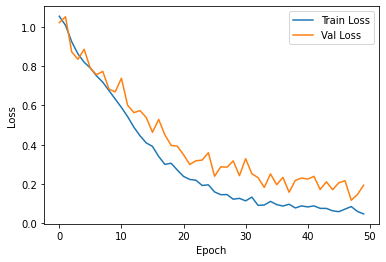

In [24]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(loss)
plt.plot(val_loss)

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend(['Train Loss','Val Loss'])

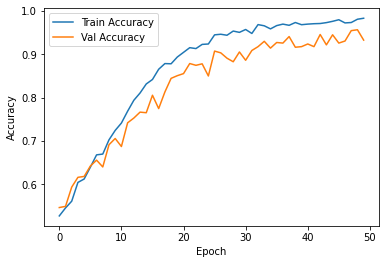

In [25]:
plt.plot(acc)
plt.plot(val_acc)

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend(['Train Accuracy','Val Accuracy'])